### Introduction
In this notebook I follow the machine learning in python course in FreeCodeCamp to create a machine learning model in tensorflow using titanic dataset.


In [4]:
# import modules
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [12]:
# load data
train = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
test = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

# get target features
y_train = train['survived'] 
y_test = test['survived']

In [7]:
# train data overview
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


In [8]:
train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


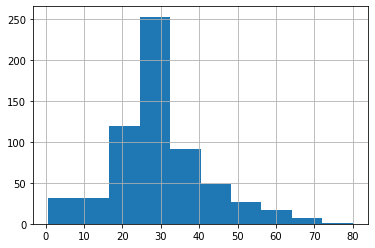

In [14]:
# plot age distribution
train['age'].hist()
plt.show()

In [15]:
# overview of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-null    int64  
 1   sex                 264 non-null    object 
 2   age                 264 non-null    float64
 3   n_siblings_spouses  264 non-null    int64  
 4   parch               264 non-null    int64  
 5   fare                264 non-null    float64
 6   class               264 non-null    object 
 7   deck                264 non-null    object 
 8   embark_town         264 non-null    object 
 9   alone               264 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.8+ KB


In [16]:
train.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [22]:
# define categorical & numeric columns
categorical_columns = ['sex','class','n_siblings_spouses','deck', 'embark_town', 'alone','parch']
numeric_columns = ['age','fare']

# create list of features
# encodes categorical features
feature_columns = []
for feature_name in categorical_columns:
    vocabulary = train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
    
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int6

In [30]:
# train a linear model
# create input function
def create_input_function(data_df,labels_df,num_epochs = 10, shuffle=True,batch_size=32):
    """
    This function takes a dataframe and converts it to a tensorflow dataset object
    
    data_df: our dataframe
    labels_df: labels for the dataframe
    num_epochs: number of epochs
    shuffle: whether we want to shuffle the data or not
    batch_size = the number of records fed into the algorithm
    """
    
    # input function
    def input_function():
        # define tensor dataset
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),labels_df))
        
        # check if we need to shuffle
        if shuffle:
            ds = ds.shuffle(1000) # randomize dataset order
        # batch the data
        ds = ds.batch(batch_size).repeat(num_epochs)
        
        return ds
    return input_function # return function


# apply function to our dataset
train_input_function = create_input_function(train,y_train)
test_input_function = create_input_function(test,y_test,num_epochs=1,shuffle=False)

        

In [31]:
# train linear classification model
# instantiate the model
linear_model = tf.estimator.LinearClassifier(feature_columns=feature_columns)

# train the model
linear_model.train(train_input_function)

# evaluate model
results = linear_model.evaluate(test_input_function)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/r7/t8phqs6x0f3dn5p8g2fzzld00000gn/T/tmpi2emevit', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in f

In [43]:
# show model results
for key, val in results.items():
    print(key,":", val)

accuracy : 0.77272725
accuracy_baseline : 0.625
auc : 0.835629
auc_precision_recall : 0.7896108
average_loss : 0.4784073
label/mean : 0.375
loss : 0.46910614
precision : 0.7241379
prediction/mean : 0.33197528
recall : 0.6363636
global_step : 200


In [47]:
# predict results using our model
# add predictions to a list
test_predictions = list(linear_model.predict(test_input_function))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r7/t8phqs6x0f3dn5p8g2fzzld00000gn/T/tmpi2emevit/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [59]:
# we can check our data based on model probabilities
print(train.loc[10])
print(test_predictions[10]['probabilities'],"survived:",y_test.loc[10])

survived                        0
sex                          male
age                            39
n_siblings_spouses              1
parch                           5
fare                       31.275
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 10, dtype: object
[0.3943353  0.60566473] survived: 1
